<a href="https://colab.research.google.com/github/Tapasyasunil/Guvi-tasks/blob/main/Glass_KNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset and Objectives:
- Provided with a dataset from USA Forensic Science Service which has description of 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest Neighbor (KNN) classifier to classify the glasses.
- Perform exploratory data analysis on the dataset using Python Pandas, including dropping irrelevant fields for predicted values, and standardization of each attribute.
- Two Scikit-Learn KNN models should be created for two different distance metrics: Square Euclidean and Manhattan distance.
- The performance of the two models using different distance metrics should be compared in terms of accuracy to the test data and Scikit-Learn Classification Report.

In [46]:
import pandas as pd
import numpy as np

In [3]:
cols = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [4]:
Glass_train = pd.read_csv('/content/trainKNN.txt', sep =',', names= cols)

In [5]:
Glass_train.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
Glass_test = pd.read_csv('/content/testKNN.txt', sep =',', names= cols)

#Feature engineering and EDA

In [7]:
#Removing the ID column as it is irrelevant
Glass_train.drop(['ID'],axis = 1, inplace = True)
Glass_test.drop(['ID'],axis = 1 , inplace = True)

In [8]:
Glass_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
#Checking corelation between features 

In [10]:
corr = Glass_train.corr()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

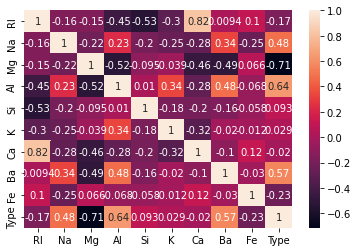

In [12]:

sns.heatmap(corr, annot = True)

- Both K and Ca have the least corelation to type
- RI and Ca are highly corelated
- We can drop K and Ca


<function matplotlib.pyplot.show(*args, **kw)>

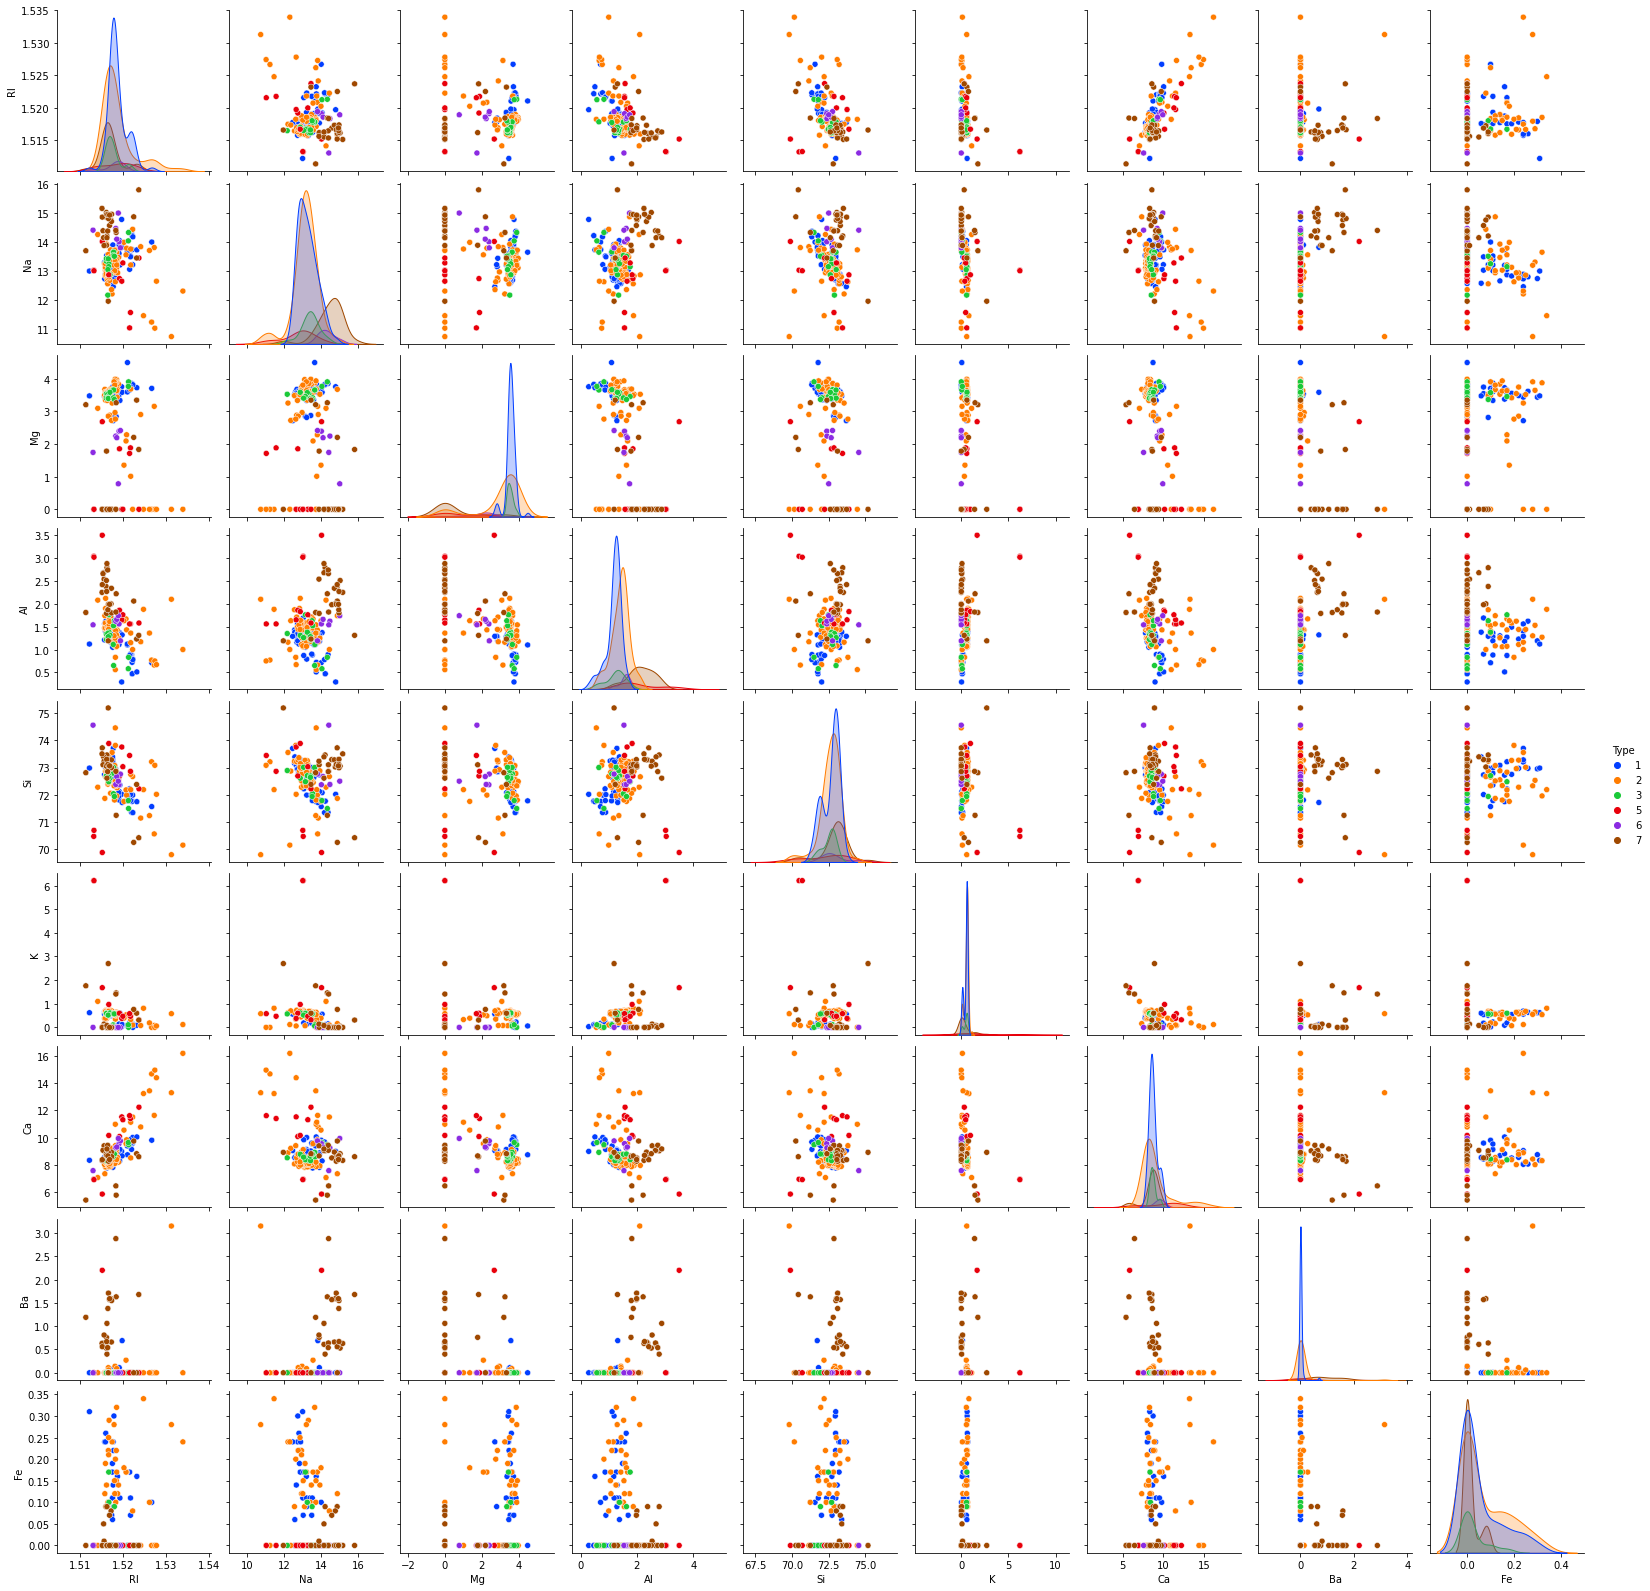

In [13]:
#pairplot to check distribution and linearity
sns.pairplot(Glass_train, hue = 'Type', palette='bright')
plt.show

#Scaling the data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
Glass_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
y_train = Glass_train.Type
X = Glass_train.drop('Type', axis=1)

In [18]:
y_test = Glass_test.Type
XT = Glass_test.drop('Type',axis =1)

In [19]:
scaler.fit(X)
scaler.fit(XT)

StandardScaler()

In [20]:
X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(XT)

In [21]:
X_train = pd.DataFrame(X_train_scaled, columns = Glass_train.columns[:-1])
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.692834,-0.117130,1.538477,-0.428762,-1.199716,-0.752489,-0.529657,-0.487942,-0.815181
1,-0.560905,0.120295,1.015088,0.031469,-0.103822,0.877545,-1.215436,-0.487942,-0.815181
2,-1.088213,-0.221597,0.985684,0.350090,0.196107,0.528252,-1.252707,-0.487942,-0.815181
3,-0.542468,-0.525501,1.068015,-0.092439,-0.242250,1.226837,-0.924726,-0.487942,-0.815181
4,-0.630967,-0.468519,1.026850,-0.180945,0.299929,1.149217,-1.036537,-0.487942,-0.815181


In [22]:
X_test = pd.DataFrame(X_test_scaled, columns = Glass_train.columns[:-1])
X_test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.880895,-0.677453,1.044492,-0.835889,-0.576787,-0.247955,0.290297,-0.487942,0.246289
1,0.880895,-0.610974,1.003326,-0.782785,-0.715215,-0.092714,0.267934,-0.487942,0.183849
2,1.426641,-0.430531,1.003326,-0.924395,-0.957466,-0.519627,0.528829,-0.487942,-0.627863
3,-0.752653,-0.724938,0.938638,0.792619,-0.115357,1.576130,-0.954542,-0.487942,-0.815181
4,-0.933339,-0.734435,0.768095,-0.198647,0.173036,1.265648,-0.484932,-0.487942,0.683365


In [23]:
X_train.drop(['K','Ca'],axis=1,inplace=True	)

In [24]:
X_test.drop(['K','Ca'], axis=1, inplace =True)

In [25]:
X_train.head()

,RI,Na,Mg,Al,Si,Ba,Fe
0,0.692834,-0.117130,1.538477,-0.428762,-1.199716,-0.487942,-0.815181
1,-0.560905,0.120295,1.015088,0.031469,-0.103822,-0.487942,-0.815181
2,-1.088213,-0.221597,0.985684,0.350090,0.196107,-0.487942,-0.815181
3,-0.542468,-0.525501,1.068015,-0.092439,-0.242250,-0.487942,-0.815181
4,-0.630967,-0.468519,1.026850,-0.180945,0.299929,-0.487942,-0.815181


In [28]:
X_train.shape

(196, 7)

In [26]:
X_test.head()

,RI,Na,Mg,Al,Si,Ba,Fe
0,0.880895,-0.677453,1.044492,-0.835889,-0.576787,-0.487942,0.246289
1,0.880895,-0.610974,1.003326,-0.782785,-0.715215,-0.487942,0.183849
2,1.426641,-0.430531,1.003326,-0.924395,-0.957466,-0.487942,-0.627863
3,-0.752653,-0.724938,0.938638,0.792619,-0.115357,-0.487942,-0.815181
4,-0.933339,-0.734435,0.768095,-0.198647,0.173036,-0.487942,0.683365


In [27]:
X_test.shape

(18, 7)

#Applying KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier


In [32]:
knn = KNeighborsClassifier(n_neighbors=4, metric = 'manhattan')
knn_eu = KNeighborsClassifier(n_neighbors = 4, metric= 'minkowski')

In [33]:
knn.fit(X_train,y_train)
knn_eu.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
y_pred = knn.predict(X_test)

In [35]:
y_pred_eu = knn_eu.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, accuracy_score


In [37]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         3
           7       0.75      1.00      0.86         3

    accuracy                           0.44        18
   macro avg       0.32      0.44      0.36        18
weighted avg       0.32      0.44      0.36        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(classification_report(y_test, y_pred_eu))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.50        18
   macro avg       0.57      0.50      0.46        18
weighted avg       0.57      0.50      0.46        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,df['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())

In [43]:
from sklearn.model_selection import cross_val_score

In [53]:
#creating a list of k values
k_range = range(1,25)
#list to store scores
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X = X_train, y = Glass_train['Type'], cv=5 , scoring = 'accuracy')
  k_scores.append(scores.mean())

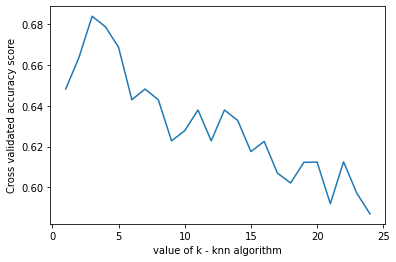

In [54]:
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()


In [56]:
k_range = range(1,25)
#list to store scores
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
  scores = cross_val_score(knn, X = X_train, y = Glass_train['Type'], cv=5 , scoring = 'accuracy')
  k_scores.append(scores.mean())

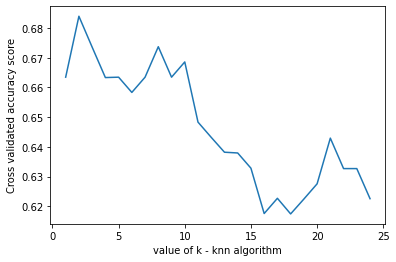

In [57]:
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()


In [58]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
knn_eu = KNeighborsClassifier(n_neighbors = 3, metric= 'minkowski')

In [59]:
knn.fit(X_train,y_train)
knn_eu.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred_3 = knn.predict(X_test)


In [61]:
y_pred_eu_3 = knn_eu.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred_eu_3))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.61        18
   macro avg       0.64      0.61      0.57        18
weighted avg       0.64      0.61      0.57        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.43      1.00      0.60         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.67      0.67      0.61        18
weighted avg       0.67      0.67      0.61        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Conclusion

- Optimal k value for both distance metrics was found to b k 
- when k = 4, manhattan model produced accuracy of 0.44 and euclidian model produced accuracy of 0.50
- with k = 3, manhattan model produced accuracy of 0.67 and euclidian model produced accuracy of 0.61